# <span style="color:blue">EVAC Workshop 1: Introduction to GAs in DEAP</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>

Before participating in this practical make sure that you have watched the pre-wrokshop materials:
- Lectures 1, 2a and 2b
- Code walkthroughs 1 and 2

# Colab Packages Install

## <span style="color:#0073e6">Learning objectives</span>

- To gain familiarity with the DEAP toolbox for Python
- To understand how to code a simple GA
- To understand crossover, selection, representation, and fitness functions
- To appreciate how algorithm parameterization can affect performance

# <span style="color:blue">Practical Instructions</span>

Below is a max-ones problem implementation (mentioned in the walkthrough) along with a simple GA solution in DEAP. Run the problem and examine the results. Then follow the exercises that follow the code.

# <span style="color:blue">Max Ones implementation</span>

In [2]:
import random
import numpy
import matplotlib.pyplot as plt
from deap import base, creator, tools

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return (sum(individual),)

toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

In [4]:
logbook = tools.Logbook()
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [5]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [6]:
NGEN = 100
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

In [7]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

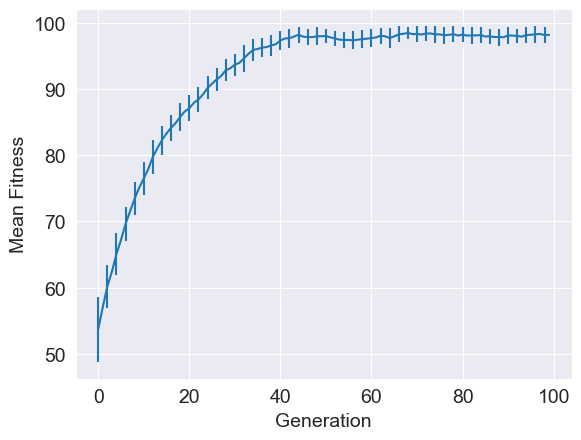

In [8]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [9]:
print(logbook)

gen	avg  	std     	min	max
0  	53.71	4.93618 	39 	66 
1  	57.03	4.33695 	46 	67 
2  	60.17	3.22507 	52 	69 
3  	62.4 	3.23419 	55 	71 
4  	65.06	3.12672 	59 	72 
5  	67.18	3.05084 	61 	74 
6  	69.61	2.57253 	63 	77 
7  	71.54	2.78359 	61 	77 
8  	73.46	2.49968 	66 	80 
9  	75.1 	2.44745 	70 	82 
10 	76.48	2.49592 	71 	83 
11 	77.94	2.82071 	69 	83 
12 	79.75	2.59374 	73 	85 
13 	81.07	2.43004 	74 	87 
14 	82.27	2.19479 	77 	88 
15 	83.3 	1.94165 	79 	88 
16 	84.15	1.941   	78 	90 
17 	84.86	1.83859 	80 	89 
18 	85.8 	2.09762 	80 	91 
19 	86.61	2.00447 	81 	92 
20 	87.1 	1.94165 	82 	92 
21 	87.92	1.90095 	83 	92 
22 	88.43	1.88284 	84 	93 
23 	89.19	1.96822 	84 	95 
24 	90.17	1.73813 	86 	95 
25 	90.82	1.85677 	86 	95 
26 	91.46	1.68178 	87 	96 
27 	91.98	1.86    	85 	96 
28 	92.85	1.70514 	87 	96 
29 	93.14	1.71476 	89 	97 
30 	93.69	1.68342 	87 	97 
31 	93.96	1.74883 	90 	99 
32 	94.63	2.08161 	89 	99 
33 	95.33	2.00027 	91 	99 
34 	95.91	1.61923 	92 	99 
35 	96.06	1.40584 	93 	99 
3

In [10]:
print(tools.selBest(pop, 1))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# <span style="color:blue">Exercise 1: Getting to know the GA</span>

- Try playing with the crossover and mutation probabilities. Can you tweak these parameters to improve performance? Why does the performance improve / not improve / get worse?

- Change the line that creates the fitness class, change weights=(1.0,) to weights=(-1.0,)). This changes the problem from a maximization problem to a minimization problem. What effect does this have?

In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualMin", list, fitness=creator.FitnessMin)
toolbox.register("individualMin", tools.initRepeat, creator.IndividualMin, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individualMin)

In [12]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

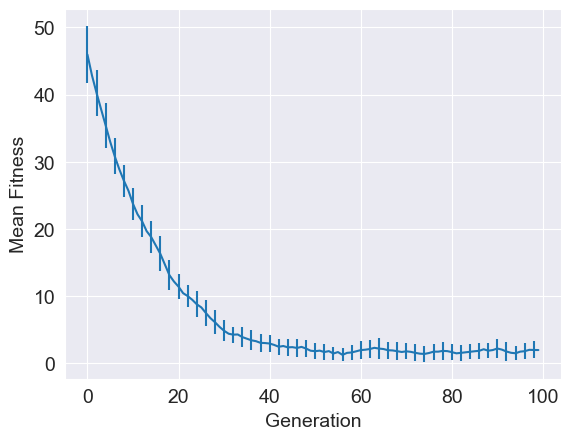

In [13]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [14]:
print(tools.selBest(pop, 1))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


- This code currently using two-point crossover to combine the genomes of selected parents to produce offspring. This produces offspring by selecting two random positions on the genome, and swapping values between these two positions. Uniform crossover randomly swaps values at each location in the genome with a given probability. Let’s begin customizing our algorithm using uniform crossover instead. Find the definition of the crossover operator, which has been registered in the toolbox as the function ‘mate’. Now change the operator (you can use the Library Reference to find the built-in command for this). Run the program.

You might see the following error:  

``TypeError: cxUniform() takes exactly 3 arguments (2 given)``  

A quick look at the documentation for the cxUniform function will show you that this is because the new crossover function takes an extra argument: the probability of a swap at each position (locus) in the genome. Find the part of the code where mating occurs and pass the toolbox.mate command the extra parameter value (say 0.1). Alternatively, you can define the comment when you register cxUnifrom as “mate”. Now your code will run.


# <span style="color:blue">Exercise 2: Implement a Real Valued Version</span>

Modify the code so that instead of counting binary 1s, the problem is to maximize the total value of genes whose values are real numbers between 0 and 1, inclusive. For example [0.5, 0.2, 0.1, 0.3] would give a fitness value of 1.1.

In [15]:
toolbox.register("attr_real", random.random)
toolbox.register("individual_real", tools.initRepeat, creator.Individual, toolbox.attr_real, n=100)
toolbox.register("population_real", tools.initRepeat, list, toolbox.individual_real)

pop = toolbox.population_real(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

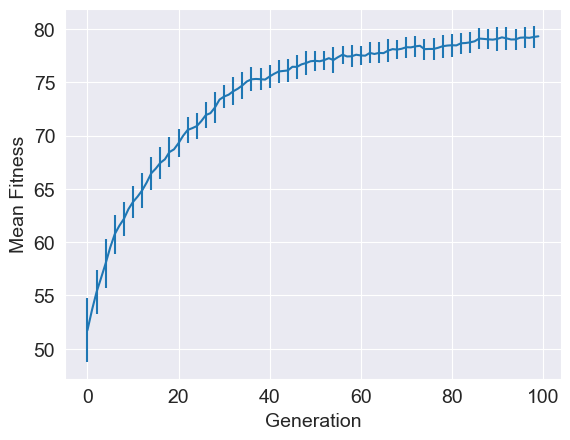

In [16]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [17]:
print(tools.selBest(pop, 1))

[[0.5664103179807172, 1.0, 0.95919323524271, 0.8401492514714594, 0.6607036819368115, 0.7838435707618545, 0.6951539698921433, 0.864895910421554, 0.4634270009921412, 0.7316905767887558, 0.7180751498901099, 0.5780318768704905, 0.8248771511043492, 0.945766034722255, 0.3057336264532322, 0.8881575371646262, 0.9203465605643699, 0.4918292941659438, 0.8227042104339516, 0.8233052675204591, 0.6446844994982233, 0.7898630269322963, 0.9605851156318486, 0.9816640977854946, 1.0, 0.7820678727947683, 0.9225579023949392, 0.8499991662439973, 1.0, 0.9255437720119847, 1.0, 0.9667746616886549, 0.9455897546419724, 0.9159365209165861, 1.0, 0.9253269725211773, 0.6927361561689852, 0.8168861851609907, 0.9247829947517144, 0.7168095199458532, 0.46216588429747296, 0.7247720298809285, 0.7803733542977372, 0.5613248594499497, 1.0, 0.8425867798600725, 0.908406547213582, 0.4643298851408375, 0.9001727501192923, 0.49783240458985545, 0.8739977318865346, 0.6968333393706062, 0.7010053179973055, 1.0, 0.7369768037041468, 0.9723

# <span style="color:blue">Exercise 3: Write your own operator</span>

Let’s write our own mutation operator and register it in the toolbox.  Implement a uniform operator for the real valued version that replaces each value in the genome with a random uniform number between 0 and 1 using a fixed mutation probability per gene, or that adds a float number to the gene.
To do this, you need to write your own Python function that takes in an individual, and anything else you need (e.g. probability of mutation per gene) and modifies the individual. The function should return a tuple, with the individual as the first element  e.g. return individual,

In [18]:
def my_mutate(individual, indpb = 0.2):
    return ([random.random() if random.random() > indpb else gene for gene in individual ],)

toolbox.register("customMutate", my_mutate, indpb=0.2)

In [19]:
toolbox.register("attr_real", random.random)
toolbox.register("individual_real", tools.initRepeat, creator.Individual, toolbox.attr_real, n=100)
toolbox.register("population_real", tools.initRepeat, list, toolbox.individual_real)

pop = toolbox.population_real(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.customMutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

[[0.9380605639330755, 0.9541402809368641, 0.7844362039619744, 0.8128251454999987, 0.9537954455514243, 0.9490725147437191, 0.6406392772021742, 0.8437446011484724, 0.9220829697182844, 0.7499867111980872, 0.8180219605945404, 0.9432147163341452, 0.678250554160005, 0.9885606265139288, 0.6286821260966413, 0.6229930516490453, 0.7606518089596126, 0.9134872236114935, 0.992201188963513, 0.9292842546593945, 0.9375074552601096, 0.9820237599375724, 0.8335849150695729, 0.4498158902891968, 0.2568500819978605, 0.9342740331393707, 0.8948823846429509, 0.9433127025748572, 0.7317880672663953, 0.6741558605950229, 0.7034858535497039, 0.771212499571678, 0.8965351942371632, 0.9964359946176029, 0.8497149556666967, 0.6590178039909468, 0.8161879935480305, 0.6886866438405017, 0.8606418808525012, 0.9103182205175914, 0.8504801185117591, 0.93386496791506, 0.9178984394767146, 0.9888645867383581, 0.836263092487603, 0.8593375672160948, 0.9836170252694209, 0.897419452673129, 0.5988523107606314, 0.8472279747944316, 0.912

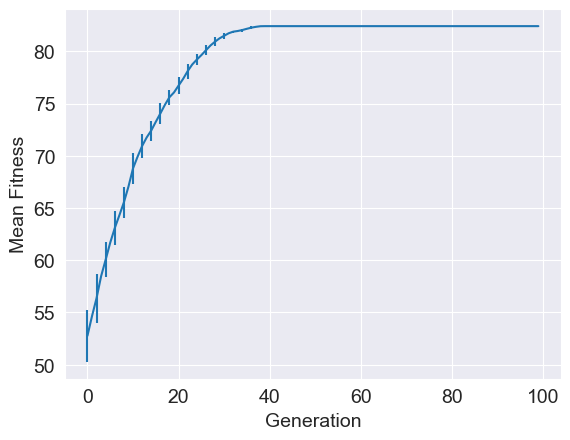

In [20]:
    logbook.record(gen=g, **record)
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")
print(tools.selBest(pop, 1))

# <span style="color:blue">Exercise 4: Change the problem to a ‘deceptive’ problem</span>

This exercise will test your understanding of the principles in this practical and teach you about the impact of choices of representation.

First, revert back to the original Max Ones code. Now modify the Max Ones problem to implement the following ‘deceptive’ problem. A deceptive problem is just a problem that has local optima in which the algorithm can become trapped. Note that the standard Max Ones problem only has a global optimum.

In this problem, the bit string should be split into six blocks of three bits, where each block is assigned a partial fitness based on the number of ones in that block. Here is an example individual:

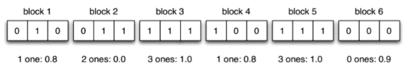

The fitness for each block of three is given as follows:
- 0 ones: partial fitness 0.9
- 1 ones: partial fitness 0.8
- 2 ones: partial fitness 0.0
- 3 ones: partial fitness 1.0

The fitness of the entire string is then determined by calculating the summed value over all blocks. For example, the individual above has a fitness of:  
``(0.8 + 0.0 + 1.0 + 0.8 + 1.0 + 0.9) = 4.5``

**Your task: Set the length of the individuals to 18 and implement this problem.**

In [24]:
def eval_blocks(individual: list) -> tuple:
    return (sum(map(lambda x: [0.9, 0.8, 0.0, 1.0][sum(x)], [individual[i:i + 3] for i in range(0, len(individual), 3)] )), )
print(eval_blocks([0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0]))

def eval_matrix(individual: list) -> tuple:
    return (sum(map(lambda x: [0.9, 0.8, 0.0, 1.0][sum(x)], individual)),)
print(eval_matrix([[0,1,0],[0,1,1],[1,1,1],[1,0,0],[1,1,1],[0,0,0]]))

(4.5,)
(4.5,)


[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 4

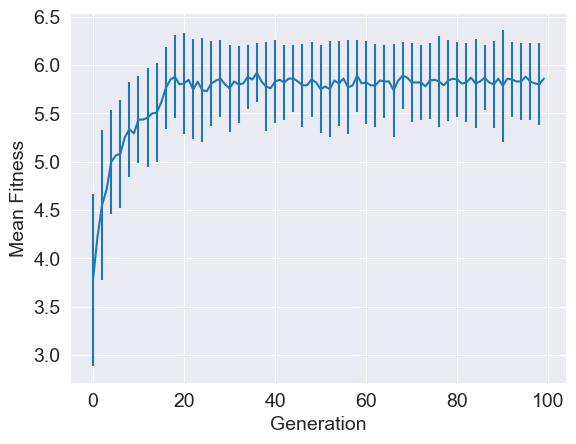

In [36]:
import numpy as np
toolbox.register("evaluateBlocks", eval_blocks)
toolbox.register("individual_18", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=18)
toolbox.register("population", tools.initRepeat, list, toolbox.individual_18)
pop = toolbox.population(n=100)
print(pop[0])
fitnesses = list(map(toolbox.evaluateBlocks, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluateBlocks, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")
print(tools.selBest(pop, 1))

<span style="color:green">Questions to think about:  </span>
- <span style="color:green">What is it about this fitness landscape that makes it (for some algorithms) difficult to traverse?  </span>
- <span style="color:green">What is the global optimum for this problem? What do you think the fitness landscape looks like?  </span>
- <span style="color:green">Run the algorithm multiple times. Do you get the same result each time?  </span>
- <span style="color:green">Does your algorithm find the global optimum? Why?  </span>
- <span style="color:green">Can you improve the result by changing parameters or operators?</span>

# <span style="color:blue">Exercise 5: Multiple runs</span>

Genetic algorithms are stochastic. As such, you might get a different result every time you run it; sometimes, for example, getting stuck on local optima and sometimes now. Try to modify the algorithm to run 50 times. Then record and plot a distribution of the final mean fitness scores. The matplotlib code for a density plot is:  

```plt.hist(avgRuns, density=True, bins=10)```  
(You might need to change the number of bins).

In [ ]:
fitness_hist = []
for i in range(50):
    print(f"Run number {i}")
    pop = toolbox.population(n=100)
    fitnesses = list(map(toolbox.evaluateBlocks, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    NGEN = 100
    logbook.clear()
    for g in range(NGEN):
        #print("-- Generation %i --" % g)

        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

        for mutant in offspring:
            toolbox.mutate(mutant)
            del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluateBlocks, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
    fitness_hist.append(toolbox.evaluateBlocks(tools.selBest(pop, 1)[0])[0])


You should see that, for this problem, there's no a lot of variation. But this is unusual with harder problems.

In [ ]:
plt.hist(fitness_hist, density=True, bins=20)